## Hyperparameters

Harvard AI Bootcamp



Read: https://towardsdatascience.com/parameters-and-hyperparameters-aa609601a9ac


Hyperparameter tuning is a massively important area of ML research and engineering, and it comprises a lot of what ML engineers and researchers do daily.

In this homework, we'll introduce some of the most fundamental hyperparameters that are commonly used in ML and go over Grid Search and Random Search, two commonly used hyperparameter tuning algorithms.

## Make a copy of this notebook! Editing directly will not be saved.

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import itertools
import random

import numpy as np
import matplotlib.pyplot as plt

In [3]:
#HYPERPARAMETERS

#TRAINING HYPERPARAMETERS
BATCH_SIZE = 5 #choose between 1 and 10
NUM_EPOCHS = 3 #choose between 1 and 5
LR = 0.001 #choose between 0.0001 to 0.1
OPTIM_ALG = "adam" #choose from ['sgd', 'adam']

#ARCHITECTURE HYPERPARAMETERS
NUM_NEURONS = 100 #anything!
ACTIVATION_FN = "relu" #choose from ['relu', 'sigmoid', 'gelu', 'tanh']

activation_fns = {'relu': nn.ReLU(), 'sigmoid': nn.Sigmoid(), 'gelu': nn.GELU(), 'tanh': nn.Tanh()}

In [4]:
#Load the Fashion MNIST dataset, a dataset of grayscaled articles of clothing

#transform is applied to all the datapoints in our dataset and commonly used to normalize/preprocess data. here, all we do is convert to tensor
transform = transforms.Compose([transforms.ToTensor()])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
testloader = DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False)

100%|██████████| 26.4M/26.4M [00:25<00:00, 1.04MB/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 120kB/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:02<00:00, 2.18MB/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.76MB/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



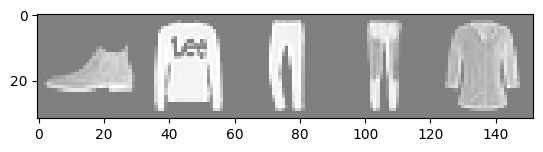

Ankle boot      	Pullover      	Trouser      	Trouser      	Shirt


In [5]:
images, labels = next(iter(testloader))

# Fashion MNIST labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print('      \t'.join(f'{classes[labels[j]]}' for j in range(BATCH_SIZE)))

In [6]:
def create_net(num_neurons, activation_fn):
  #TODO: Implement a function that creates and returns a 1 layer neural network given the above hyperparameters
  #the dimension of the input of the network should be 28*28 and the dimension of the output should be 10
  class Net(nn.Module):
      def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, num_neurons),
            activation_fn,
            nn.Linear(num_neurons, 10)
        )

      def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits
  return Net()
net = create_net(NUM_NEURONS, activation_fns[ACTIVATION_FN])

In [7]:
#Define a Loss function and optimizer
criterion = nn.CrossEntropyLoss()

if OPTIM_ALG == "sgd":
  optimizer = optim.SGD(net.parameters(), lr=LR)
elif OPTIM_ALG == "adam":
  optimizer = optim.Adam(net.parameters(), lr = LR)

[1,  2000] loss: 0.713
[1,  4000] loss: 0.497
[1,  6000] loss: 0.473
[1,  8000] loss: 0.439
[1, 10000] loss: 0.424
[1, 12000] loss: 0.408
[2,  2000] loss: 0.387
[2,  4000] loss: 0.375
[2,  6000] loss: 0.383
[2,  8000] loss: 0.373
[2, 10000] loss: 0.381
[2, 12000] loss: 0.369
[3,  2000] loss: 0.346
[3,  4000] loss: 0.357
[3,  6000] loss: 0.335
[3,  8000] loss: 0.352
[3, 10000] loss: 0.343
[3, 12000] loss: 0.347
Finished Training


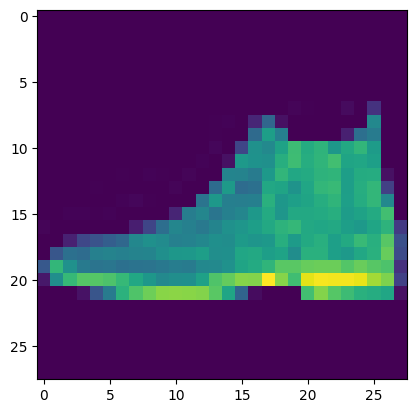

Prediction:  tensor([9]) Ankle boot
Correct:  tensor(9) Ankle boot


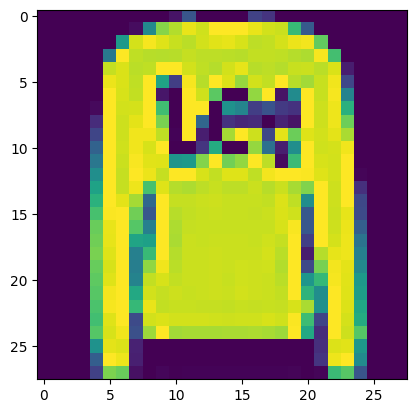

Prediction:  tensor([2]) Pullover
Correct:  tensor(2) Pullover


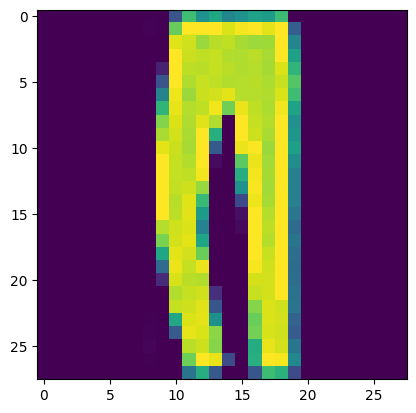

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


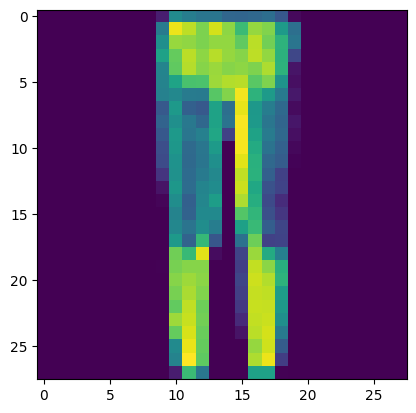

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


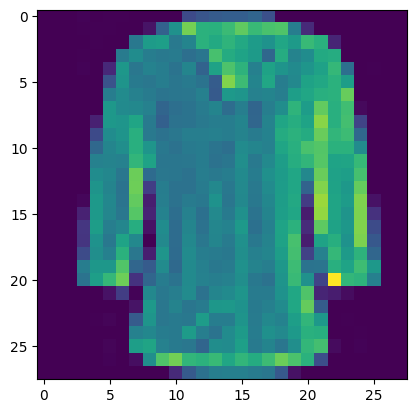

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


In [8]:
def train_net(trainloader, criterion, optimizer, net, num_epochs):
  #TODO: implement a function that trains a neural network given the above inputs and returns the trained net
  for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0
  print('Finished Training')
  return net

net = train_net(trainloader, criterion, optimizer, net, NUM_EPOCHS)

for i in range(BATCH_SIZE):
  imshow(images[i,:])
  pred = torch.max(net(images[i]).data, 1).indices
  print("Prediction: ", pred, classes[pred])
  print("Correct: ", labels[i], classes[labels[i]])

Accuracy of the network on the 10000 test images: 86.24%


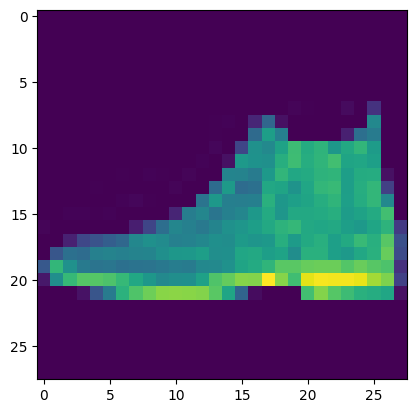

Prediction:  tensor([9]) Ankle boot
Correct:  tensor(9) Ankle boot


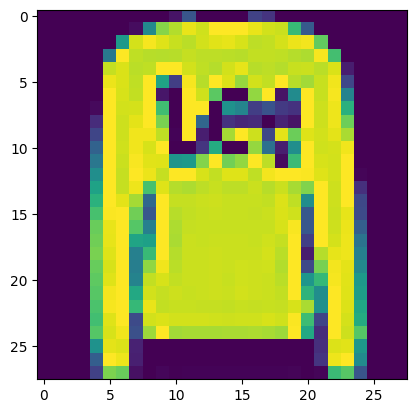

Prediction:  tensor([2]) Pullover
Correct:  tensor(2) Pullover


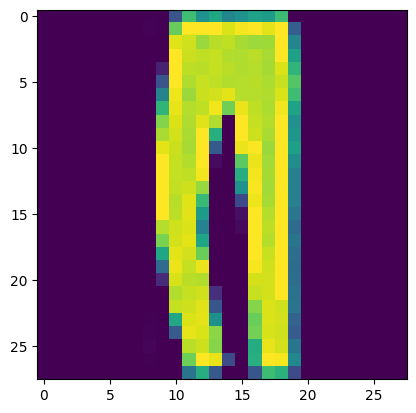

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


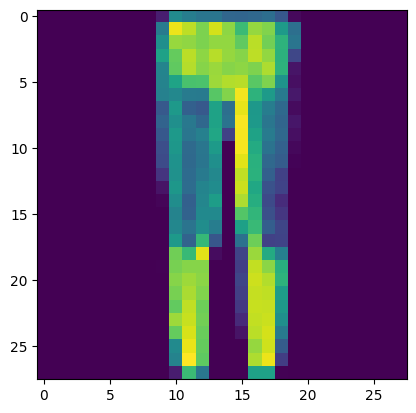

Prediction:  tensor([1]) Trouser
Correct:  tensor(1) Trouser


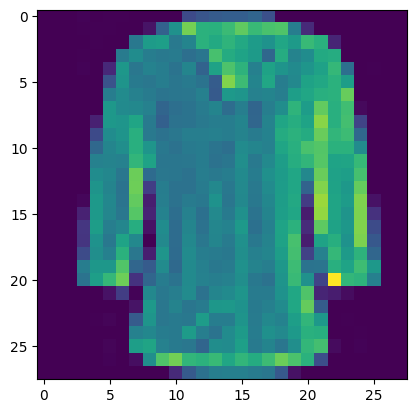

Prediction:  tensor([6]) Shirt
Correct:  tensor(6) Shirt


In [9]:
# Test the network on the test data
def test_acc(net, testloader):
  #TODO: return the accuracy of the model on all the images in the testdataset
  correct = 0
  total = 0
  # since we're not training, we don't need to calculate the gradients for our outputs
  with torch.no_grad():
      for data in testloader:
          images, labels = data
          # calculate outputs by running images through the network
          outputs = net(images)
          # the class with the highest energy is what we choose as prediction
          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()
  return 100 * correct / total

print(f'Accuracy of the network on the 10000 test images: {test_acc(net, testloader)}%')

for i in range(BATCH_SIZE):
  imshow(images[i,:])
  pred = torch.max(net(images[i]).data, 1).indices
  print("Prediction: ", pred, classes[pred])
  print("Correct: ", labels[i], classes[labels[i]])

## Grid Search

Read about grid search and random search here: https://neptune.ai/blog/hyperparameter-tuning-in-python-complete-guide

They're both pretty simple methods. For grid search, itertools.product will be helpful and for random search, random.choice will be helpful.

In [10]:
from torch.utils.data import RandomSampler, DataLoader, Subset

#We'll use a subset of the training/testing data to make things run faster
search_trainset = Subset(trainset, np.arange(1000))
search_testset = Subset(testset, np.arange(1000))

# Define the hyperparameter space
batch_sizes = [1, 5]
num_epochs = [1, 5]
learning_rates = [0.001, 0.01]
nums_neurons = [100, 1000]
activation_fns = {'relu': nn.ReLU(), 'gelu': nn.GELU()}
optim_alg = "adam" #we'll just only use adam here because it will cut runtime in half and adam is just plainly superior than sgd

In [11]:
import itertools

best_accuracy = 0
best_params = {}

# Get keys for activation functions
activation_fn_names = list(activation_fns.keys())

# Combine all hyperparameters into a single iterable for grid search
hyperparameter_combinations = itertools.product(
    batch_sizes,
    num_epochs,
    learning_rates,
    nums_neurons,
    activation_fn_names
)

print("Starting Grid Search...")

for batch_size, num_epoch, lr, num_neuron, activation_fn_name in hyperparameter_combinations:
    print(f"\nTrying combination: BATCH_SIZE={batch_size}, NUM_EPOCHS={num_epoch}, LR={lr}, NUM_NEURONS={num_neuron}, ACTIVATION_FN={activation_fn_name}")

    # Set current hyperparameters
    current_BATCH_SIZE = batch_size
    current_NUM_EPOCHS = num_epoch
    current_LR = lr
    current_NUM_NEURONS = num_neuron
    current_ACTIVATION_FN = activation_fns[activation_fn_name]

    # Create new DataLoaders with the current batch size
    current_trainloader = DataLoader(search_trainset, batch_size=current_BATCH_SIZE, shuffle=True)
    current_testloader = DataLoader(search_testset, batch_size=current_BATCH_SIZE, shuffle=False)

    # Create, define, and train the network
    net = create_net(current_NUM_NEURONS, current_ACTIVATION_FN)
    criterion = nn.CrossEntropyLoss()

    # We are only using 'adam' for optimizer as per the problem statement
    optimizer = optim.Adam(net.parameters(), lr=current_LR)

    net = train_net(current_trainloader, criterion, optimizer, net, current_NUM_EPOCHS)

    # Evaluate the network
    accuracy = test_acc(net, current_testloader)
    print(f'Accuracy for this combination: {accuracy:.2f}%')

    # Check if this is the best model so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = {
            'BATCH_SIZE': current_BATCH_SIZE,
            'NUM_EPOCHS': current_NUM_EPOCHS,
            'LR': current_LR,
            'NUM_NEURONS': current_NUM_NEURONS,
            'ACTIVATION_FN': activation_fn_name
        }

print("\nGrid Search Finished.")
print(f"Best accuracy found: {best_accuracy:.2f}%")
print(f"Best parameters: {best_params}")

Starting Grid Search...

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.001, NUM_NEURONS=100, ACTIVATION_FN=relu
Finished Training
Accuracy for this combination: 62.80%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.001, NUM_NEURONS=100, ACTIVATION_FN=gelu
Finished Training
Accuracy for this combination: 75.20%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.001, NUM_NEURONS=1000, ACTIVATION_FN=relu
Finished Training
Accuracy for this combination: 67.60%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.001, NUM_NEURONS=1000, ACTIVATION_FN=gelu
Finished Training
Accuracy for this combination: 61.50%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.01, NUM_NEURONS=100, ACTIVATION_FN=relu
Finished Training
Accuracy for this combination: 50.80%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.01, NUM_NEURONS=100, ACTIVATION_FN=gelu
Finished Training
Accuracy for this combination: 57.80%

Trying combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.01, NUM_NEURONS=

## Random Search



In [12]:
#TODO implement random search
best_accuracy = 0
best_params = {}
num_iterations = 16  # Number of random combinations to try

In [13]:
print("Starting Random Search...")

best_accuracy_random = 0
best_params_random = {}


for _ in range(num_iterations):
    # Randomly sample hyperparameters
    batch_size = random.choice(batch_sizes)
    num_epoch = random.choice(num_epochs)
    lr = random.choice(learning_rates)
    num_neuron = random.choice(nums_neurons)
    activation_fn_name = random.choice(list(activation_fns.keys()))

    print(f"\nTrying random combination: BATCH_SIZE={batch_size}, NUM_EPOCHS={num_epoch}, LR={lr}, NUM_NEURONS={num_neuron}, ACTIVATION_FN={activation_fn_name}")

    # Set current hyperparameters
    current_BATCH_SIZE = batch_size
    current_NUM_EPOCHS = num_epoch
    current_LR = lr
    current_NUM_NEURONS = num_neuron
    current_ACTIVATION_FN = activation_fns[activation_fn_name]

    # Create new DataLoaders with the current batch size
    current_trainloader = DataLoader(search_trainset, batch_size=current_BATCH_SIZE, shuffle=True)
    current_testloader = DataLoader(search_testset, batch_size=current_BATCH_SIZE, shuffle=False)

    # Create, define, and train the network
    net = create_net(current_NUM_NEURONS, current_ACTIVATION_FN)
    criterion = nn.CrossEntropyLoss()

    # We are only using 'adam' for optimizer as per the problem statement
    optimizer = optim.Adam(net.parameters(), lr=current_LR)

    net = train_net(current_trainloader, criterion, optimizer, net, current_NUM_EPOCHS)

    # Evaluate the network
    accuracy = test_acc(net, current_testloader)
    print(f'Accuracy for this random combination: {accuracy:.2f}%')

    # Check if this is the best model so far
    if accuracy > best_accuracy_random:
        best_accuracy_random = accuracy
        best_params_random = {
            'BATCH_SIZE': current_BATCH_SIZE,
            'NUM_EPOCHS': current_NUM_EPOCHS,
            'LR': current_LR,
            'NUM_NEURONS': current_NUM_NEURONS,
            'ACTIVATION_FN': activation_fn_name
        }

print("\nRandom Search Finished.")
print(f"Best accuracy found (Random Search): {best_accuracy_random:.2f}%")
print(f"Best parameters (Random Search): {best_params_random}")

Starting Random Search...

Trying random combination: BATCH_SIZE=5, NUM_EPOCHS=1, LR=0.001, NUM_NEURONS=100, ACTIVATION_FN=relu
Finished Training
Accuracy for this random combination: 69.70%

Trying random combination: BATCH_SIZE=5, NUM_EPOCHS=5, LR=0.001, NUM_NEURONS=100, ACTIVATION_FN=relu
Finished Training
Accuracy for this random combination: 77.70%

Trying random combination: BATCH_SIZE=5, NUM_EPOCHS=1, LR=0.01, NUM_NEURONS=100, ACTIVATION_FN=gelu
Finished Training
Accuracy for this random combination: 72.30%

Trying random combination: BATCH_SIZE=1, NUM_EPOCHS=5, LR=0.001, NUM_NEURONS=100, ACTIVATION_FN=relu
Finished Training
Accuracy for this random combination: 76.00%

Trying random combination: BATCH_SIZE=5, NUM_EPOCHS=5, LR=0.01, NUM_NEURONS=100, ACTIVATION_FN=gelu
Finished Training
Accuracy for this random combination: 72.50%

Trying random combination: BATCH_SIZE=1, NUM_EPOCHS=1, LR=0.01, NUM_NEURONS=100, ACTIVATION_FN=gelu
Finished Training
Accuracy for this random combina